<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>LIFE EXPECTANCY ANALYSIS AND PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 
<tr>
        <td>
            <div align="right">
                <font size=4px>
                    <b>- USING ML AND POWERBI
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.

## Data Definition:

<i>Input variables:</i>


1. **Country** Country names
2. **Year**	 Year of data recorded
3. **Status**	Developed or Developing status
4. **Adult Mortality**	Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
5. **infant deaths** Number of Infant Deaths per 1000 population
6. **Alcohol**	Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
7. **percentage expenditure**	Expenditure on health as a percentage of Gross Domestic Product per capita(%)
8. **Hepatitis B**	Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
9. **Measles**	number of reported cases per 1000 population
10. **BMI**	Average Body Mass Index of entire population
11. **under-five deaths** Number of under-five deaths per 1000 population

12. **Polio**	Polio (Pol3) immunization coverage among 1-year-olds (%)

13. **Total expenditure**	General government expenditure on health as a percentage of total government expenditure (%)

14. **Diphtheria**	Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

15. **HIV/AIDS**Deaths per 1 000 live births HIV/AIDS (0-4 years)

16. **GDP**	Gross Domestic Product per capita (in USD)

17. **Population**	Population of the country

18. **thinness 1-19 years**	Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

19. **thinness 5-9 years**	Prevalence of thinness among children for Age 5 to 9(%)

20. **Income composition of resources**	Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

21. **Schooling**	Number of years of Schooling(years)


<i>Output variable (desired target):</i>

22. **Life expectancy**	(target) Life Expectancy in years



<a id='mport Data From MySQL Database'></a>
## 1. Import Data From MySQL Database

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as my_sql

<a id='MySQL Connect'></a>
## 1.1 MySQL Connect

In [2]:
db=my_sql.connect(host="localhost",user="root",password="mytheesh@1626",database="capstone_project",auth_plugin='mysql_native_password')
db

In [3]:
#Set cursor Object_
mycursor=db.cursor()
mycursor=db.cursor( buffered=True , dictionary=True)

<a id='Read Data From MySQL Database'></a>
## 1.2 Read Data From MySQL Database


In [4]:
#Access table from yout Datbase
mycursor.execute('SELECT * FROM `led`')

In [5]:
ldf=pd.DataFrame(mycursor.fetchall())
data=ldf.copy()


In [6]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


<a id='Exploratory Data Analysis'></a>
## 2. Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   int64  
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.0,2004.000000,2008.000000,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.898931e+01,1.032744e+01,0.0,63.000000,72.000000,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.642355e+02,1.244511e+02,0.0,73.000000,144.000000,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.0,0.000000,3.000000,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.298928e+00,4.079748e+00,0.0,0.470000,3.130000,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.0,4.685343,64.912906,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,6.570558e+01,3.887832e+01,0.0,24.000000,87.000000,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.0,0.000000,17.000000,3.602500e+02,2.121830e+05
BMI,2938.0,3.787777e+01,2.034492e+01,0.0,19.000000,43.000000,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.0,0.000000,4.000000,2.800000e+01,2.500000e+03


In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# 'shape' function gives the total number of rows and columns in the data
data.shape

(2938, 22)

<a id='Checking Missing Values'></a>
## 2.1 Checking Missing Values

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Country,0,0.0
Year,0,0.0
Income composition of resources,0,0.0
thinness 5-9 years,0,0.0
thinness 1-19 years,0,0.0
Population,0,0.0
GDP,0,0.0
HIV/AIDS,0,0.0
Diphtheria,0,0.0
Total expenditure,0,0.0


<a id='Visualization of the Data - PowerBI Report'></a>
## 2.2  Visualization of the Data - PowerBI Report


### Interface Jupyter and PowerBI to visualize the data.
  - Get the report from powerBI by DeviceCodeLoginAuthentication from PowerBIClient Module.

In [1]:
#import library
from powerbiclient import Report, models

In [2]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code H7MJH66R4 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [3]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="77100a0b-f74a-40e5-ad28-7b3afa16ebe3"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report

#Use this Link to view if not interface
#https://app.powerbi.com/reportEmbed?reportId=77100a0b-f74a-40e5-ad28-7b3afa16ebe3&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

Report()

<a id='import_packages'></a>
## 3. Statistical Analysis on factors influencing Life Expectancy

## 3.1 The impact of Immunization coverage on life Expectancy

In [15]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="1be3cf5a-bc0b-4aa3-bbf5-7515f4011320"
report2 = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report2

#Use this Link to view if not interface
#https://app.powerbi.com/reportEmbed?reportId=1be3cf5a-bc0b-4aa3-bbf5-7515f4011320&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

Report()

## 3.2 How Percentage Expenditure will affect lower life expectancy?

In [16]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="d211d54d-e9c9-4f0c-8568-a765b67f5080"
report3 = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report3
#Use this Link to view if not interface
#https://app.powerbi.com/reportEmbed?reportId=d211d54d-e9c9-4f0c-8568-a765b67f5080&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

Report()

## 3.3 How does Infant and Adult mortality rates affect life expectancy?

In [17]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="4a421673-aa6f-46b0-9819-a72f61e3c932"
report4 = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report4
#Use this Link to view if not interface
#https://app.powerbi.com/reportEmbed?reportId=4a421673-aa6f-46b0-9819-a72f61e3c932&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

Report()

<a id='Visualization of the Data - PowerBI Report'></a>
## 4. Data Preprocessing


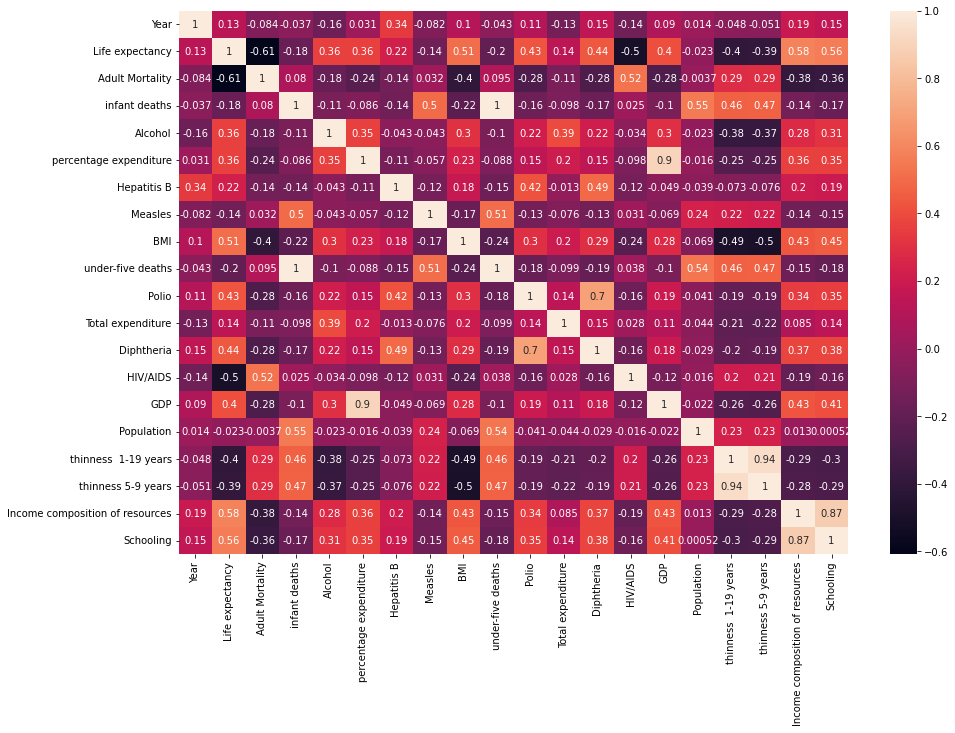

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<a id='Plot a heatmap for visualization of 
  missing values.'></a>
## 4.1 Plot a heatmap -  Visualization of missing values.

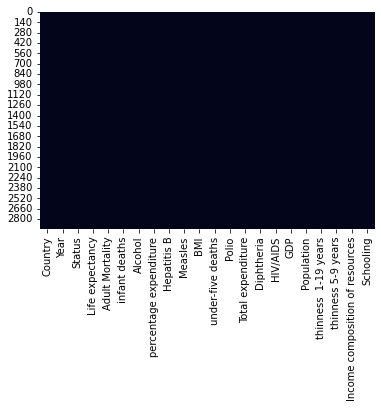

In [19]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(data.isnull(), cbar=False)

# display the plot
plt.show()

#### We determine:
- The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no      missing values.

In [20]:
data.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2
Adult Mortality,263,271,268,272,275
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
Hepatitis B,65,62,64,67,68
Measles,1154,492,430,2787,3013


<a id='Converting Categorial values into Numerical values'></a>
## 4.2 Converting Categorial values into Numerical values


In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
data['Country']=labelencoder.fit_transform(data['Country'])
data['Year']=labelencoder.fit_transform(data['Year'])
data['Status']=labelencoder.fit_transform(data['Status'])
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,15,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,0,14,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,0,13,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,0,12,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,0,11,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   int64  
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<a id='Splitting the data into X and y'></a>
## 4.3 Splitting the data into x and y


In [23]:
X=data.drop('Life expectancy',axis=1) #Features
y=data['Life expectancy']             #Target

<a id='Splitting the data into Train and Test Splits'></a>
## 4.4 Splitting the data into Train and Test Splits

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [25]:
X_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1617,102,0,1,139,0,1.83,300.162103,96,20,15.2,...,98,8.00,98,0.1,2182.997110,286,14.8,14.8,0.577,11.3
1331,85,14,1,113,4,0.41,63.878452,98,20,64.8,...,98,7.45,98,0.1,466.947750,88936,3.9,3.9,0.737,13.1
1814,118,14,1,158,18,0.01,8.523486,92,1279,18.5,...,92,5.80,92,0.1,76.238698,28323241,15.9,16.3,0.551,12.4
216,13,7,1,113,0,8.47,1641.309810,93,0,48.4,...,93,5.64,93,0.1,16462.485560,0,3.9,3.9,0.771,15.0
445,44,2,1,473,65,3.13,0.000000,48,5882,2.4,...,7,4.47,64,6.9,0.000000,0,7.7,7.7,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,36,8,1,255,2,0.12,93.367890,81,0,2.6,...,81,5.13,81,0.1,795.975190,657229,7.2,7.1,0.461,10.2
1599,101,2,1,14,4,0.49,216.702948,95,408,27.9,...,94,3.40,94,0.1,4167.364387,24198811,9.5,9.3,0.723,12.0
1361,86,0,1,292,9,6.00,112.541157,99,245,43.9,...,96,4.16,97,0.1,1229.958000,14883626,2.7,2.7,0.676,12.1
1547,98,6,0,85,0,11.98,15345.490700,95,8,57.5,...,99,7.75,99,0.1,89739.711700,472637,0.9,0.9,0.880,13.5


In [26]:
y_train

1617    69.6
1331    74.0
1814    69.6
216     74.2
445     47.7
        ... 
599     61.0
1599    72.9
1361    63.9
1547    79.4
863     58.5
Name: Life expectancy, Length: 2350, dtype: float64

# 5. Modelling 

#### FIND THE MOST SUITABLE ALGORITHM

In [27]:
# Importing the Models and Model Evaluators
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<a id='Put models in a dictionary'></a>
## 5.1 Put models in a dictionary

In [28]:
models = { "Linear Regression": LinearRegression(), 
           "Random Forest": RandomForestRegressor(),
           "Decision tree": DecisionTreeRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(101)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

<a id='Evaluate and Compare the Model Scores'></a>
## 5.2 Evaluate and Compare the Model Scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.7946281268985743,
 'Random Forest': 0.9606835446908324,
 'Decision tree': 0.9295401567406675}

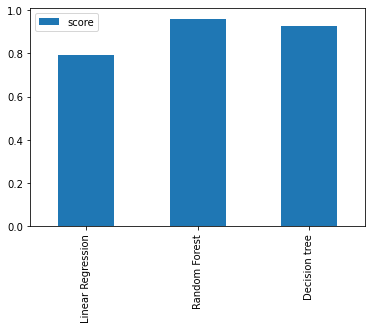

In [30]:
model_compare = pd.DataFrame(model_scores, index=['score'])
model_compare.T.plot.bar();

## 6. Hyerparameter tuning with RandomizedSearchCV

In [40]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                              random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [41]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [42]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    max_depth=10,
                                    n_jobs=-1,
                                    random_state=101)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=30,
                      n_jobs=-1, random_state=101)

In [43]:
 ideal_model.score(X_test, y_test)

0.9603446273350983

In [44]:
# Make predictions on test data
y_preds=ideal_model.predict(X_test)

In [45]:
y_preds

array([63.63871743, 54.61437355, 82.13750579, 65.30377368, 72.71244665,
       73.19095138, 68.32076229, 81.39145748, 60.50605556, 82.77565574,
       61.77695474, 71.49032985, 74.68715186, 74.78787866, 51.77066397,
       73.89830818, 68.39479661, 71.85149932, 70.66762802, 76.235606  ,
       56.79153877, 56.37379989, 74.95323766, 71.56775874, 68.9158556 ,
       53.51536707, 71.90182151, 73.47692476, 67.68670926, 73.90675876,
       55.27953202, 54.72088221, 74.48052633, 74.59705412, 82.0081258 ,
       71.21815827, 73.96010496, 63.09376225, 71.27051122, 58.72343685,
       59.46081599, 81.71413923, 64.90656457, 73.07743244, 68.08980783,
       69.2795689 , 73.77105125, 73.11682081, 74.52399945, 67.80539744,
       74.39713909, 80.71392478, 53.15812605, 82.03849881, 60.42375932,
       62.68041022, 81.5784296 , 68.72730062, 74.50394119, 52.45921872,
       67.75507964, 66.50342462, 72.00460163, 81.40728547, 73.69606161,
       62.3433981 , 80.72782033, 74.61329773, 82.43061338, 72.24

In [46]:
y_test

1201    62.5
1628    53.6
1317    83.3
1392    64.3
1308    73.5
        ... 
2431    81.6
819     73.3
2493    55.0
260     69.4
352     75.0
Name: Life expectancy, Length: 588, dtype: float64

## 7. Evaluating the Model

In [47]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_preds))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, y_preds))
print('R_square score: %.2f' % r2_score(y_test, y_preds))

Mean squared error: 3.43
Mean absolute error: 1.24
R_square score: 0.96


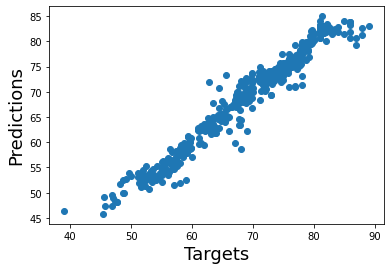

In [48]:
plt.scatter(y_test,y_preds)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

## 8. Feature Importance

## 8.1 Find feature importance of our best model

In [49]:
ideal_model.feature_importances_

array([0.00278575, 0.00537193, 0.00521254, 0.28751652, 0.00494256,
       0.00924993, 0.00194836, 0.00378796, 0.00181467, 0.04146067,
       0.00473988, 0.00302173, 0.00498872, 0.0038887 , 0.29137285,
       0.00536718, 0.00482285, 0.0103422 , 0.02135234, 0.21623411,
       0.06977855])

In [50]:
# Function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

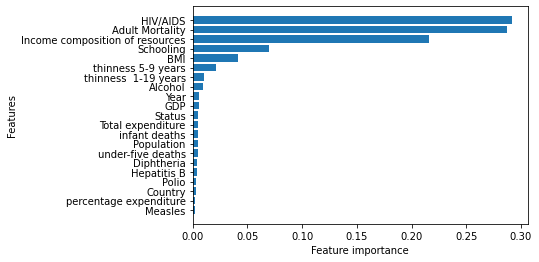

In [51]:
plot_features(X_train.columns, ideal_model.feature_importances_)

## 9. COMPARATIVE ANALYSIS OF LIFE EXPECTANCY 

<tr>
        <td>
            <div align="LEFT">
                <font size=2px>
                    <b>- BETWEEN DEVELOPED AND DEVELOPING COUNTRIES
                    </b>
                </font>
            </div>
        </td>
    </tr>
    

In [52]:
le_df = ldf.copy()

#dropping unwanted columns
le_df.drop(['Year', 'Status'], axis=1, inplace=True)

#renaming columns
le_df.rename(columns={'Life expectancy':'Life Expectancy', 'infant deaths':'Infant Deaths', 
                      'percentage expenditure':'Percentage Expenditure',
                      'under-five deaths':'Under-Five Deaths',
                     'thinness  1-19 years':'Thinness 10-19 years',
                      'thinness 5-9 years':'Thinness 5-9 years'}, inplace=True)


numeric_data = le_df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns  
for i in numeric_col:
    mean = le_df[i].mean()
    le_df[i].fillna(mean,inplace = True)
le_df = le_df.groupby('Country').mean()
le_df

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.381250,236.185241,58.5000,1943.8750,48.74375,23.5000,91.7500,4.316250,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.381875,102.100268,39.5000,3561.3125,18.01875,132.6250,46.1250,3.674375,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.452500,1001.585226,92.1250,0.0000,38.42500,0.0000,96.9375,4.491875,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,6.956250,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,4.686250,68.5000,0.10000,0.000000,0.000000e+00,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,2.894375,0.000000,71.1250,4232.9375,11.18750,36.5000,94.9375,5.603750,91.7500,0.14375,0.000000,0.000000e+00,14.92500,15.62500,0.627062,11.51250
Yemen,63.86250,211.8125,39.3750,0.044375,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,4.692500,72.6250,0.10000,0.000000,0.000000e+00,13.83125,13.75000,0.475500,8.50625


## 9.1 Splitting into dependant & independant variables

In [53]:
life = le_df['Life Expectancy']
features = le_df.drop(['Life Expectancy'], axis=1)

## 9.2 Plot Graph

In [54]:
countries = ['Brazil', 'Russian Federation', 'South Africa', 'China', 'India', 'United States of America', 'France', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Australia']
life_exp = []
hiv = []
adult_mortality = []
percent_expenditure = []
for i in countries:
    life_exp.append(life.loc[i])
    percent_expenditure.append(features.loc[i]['Percentage Expenditure'])
    hiv.append(features.loc[i]['HIV/AIDS'])
    adult_mortality.append(features.loc[i]['Adult Mortality'])

## 9.2.1 HIV Comparison

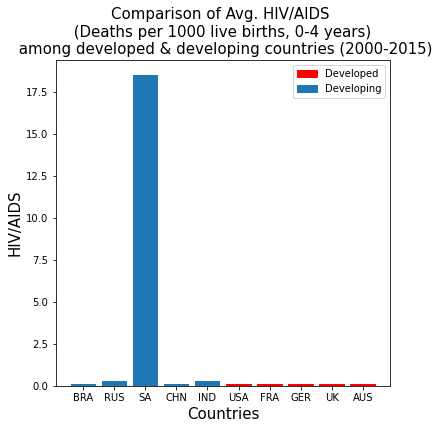

In [55]:
#HIV comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, hiv)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. HIV/AIDS \n (Deaths per 1000 live births, 0-4 years) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('HIV/AIDS', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

## 9.2.2 Adult Mortality comparison

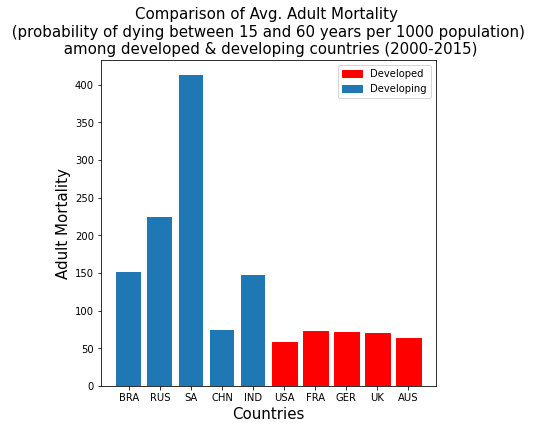

In [56]:
#Adult Mortality comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, adult_mortality)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Adult Mortality \n (probability of dying between 15 and 60 years per 1000 population) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Adult Mortality', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

## 9.2.3 Life Expectancy comparison

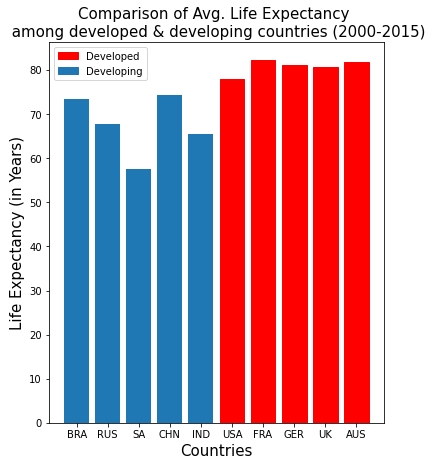

In [57]:
#Life Expectancy comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,7))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, life_exp)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Life Expectancy \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Life Expectancy (in Years)', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

#### CONLUSION

The prediction model is trained using three regression models, namely Linear Regression, Decision Tree Regressor and Random Forest Regressor. The selection of model is done on the basis of R 2 score, Mean Squared Error & Mean Absolute Error. Random Forest Regressor is selected for the development of the prediction model for life expectancy and the comparative analysis of life expectancy between developed and developing countries suggests that, developed countries have high life expectancy as compared to developing countries. 
